In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fudebako

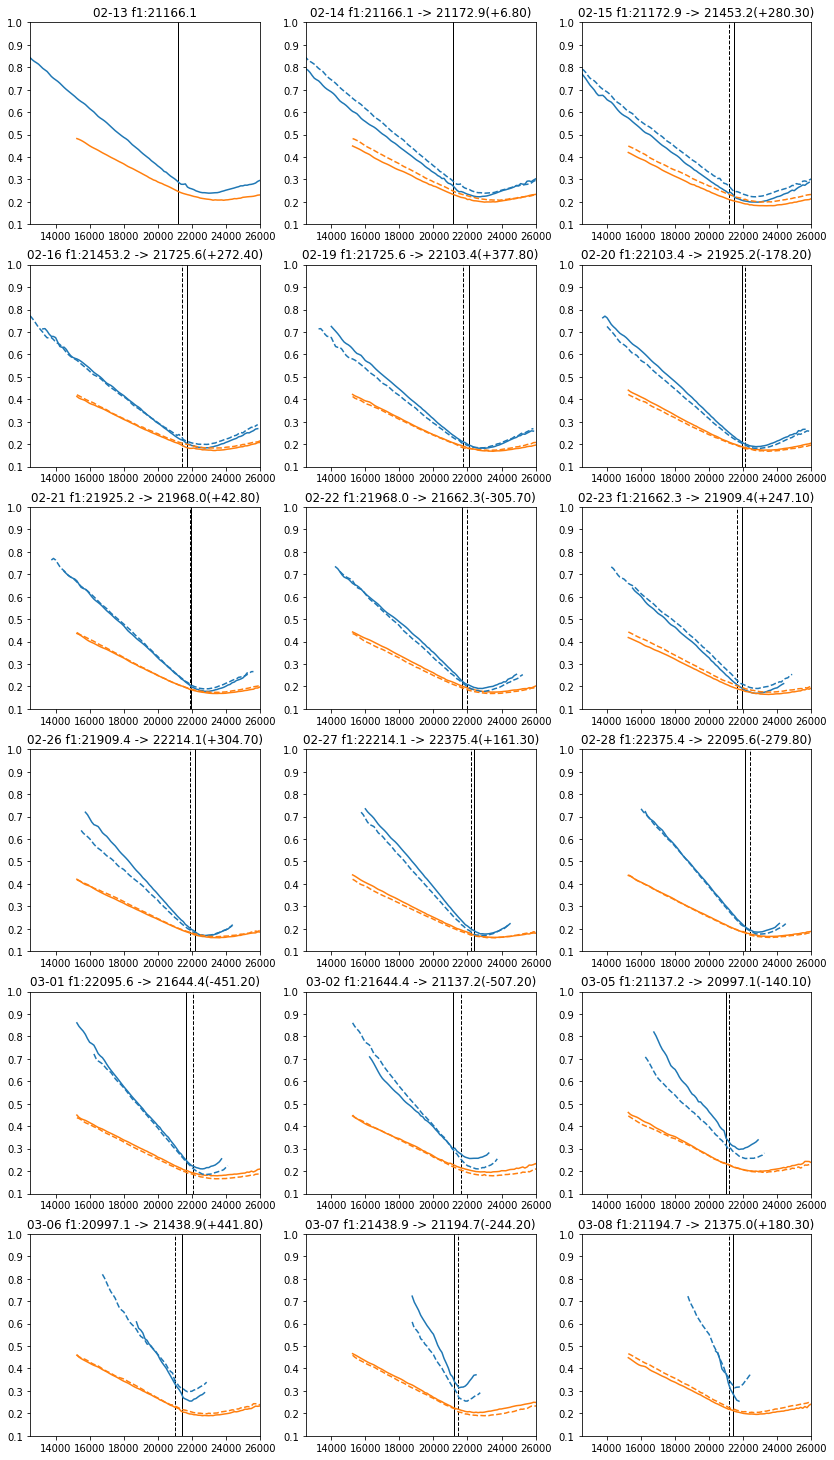

In [41]:
fig = plt.figure(figsize=(14, 26))
ax = [fig.add_subplot(6, 3, i) for i in range(1, 19)]
prev1, prev2 = None, None
for i, t0 in enumerate(fudebako.s_df.index):
    prev1, prev2 = fudebako.plot_iv(t0, ax[i], prev1, prev2)
plt.show()

In [42]:
from ipywidgets import interact

@interact(n=(0, len(fudebako.s_df.index) - 1))
def plot_iv_by_num(n=0):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    prev1, prev2 = fudebako.plot_iv(fudebako.s_df.index[n], ax)
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=17), Output()), _dom_classes=('widget-interact',…

In [30]:
# importlib.reload(fudebako)

fudebako.set_data(
    "data/s_20180608-22.pickle",
    "data/op1_20180608-22.pickle",
    "data/op2_20180608-22.pickle",
)

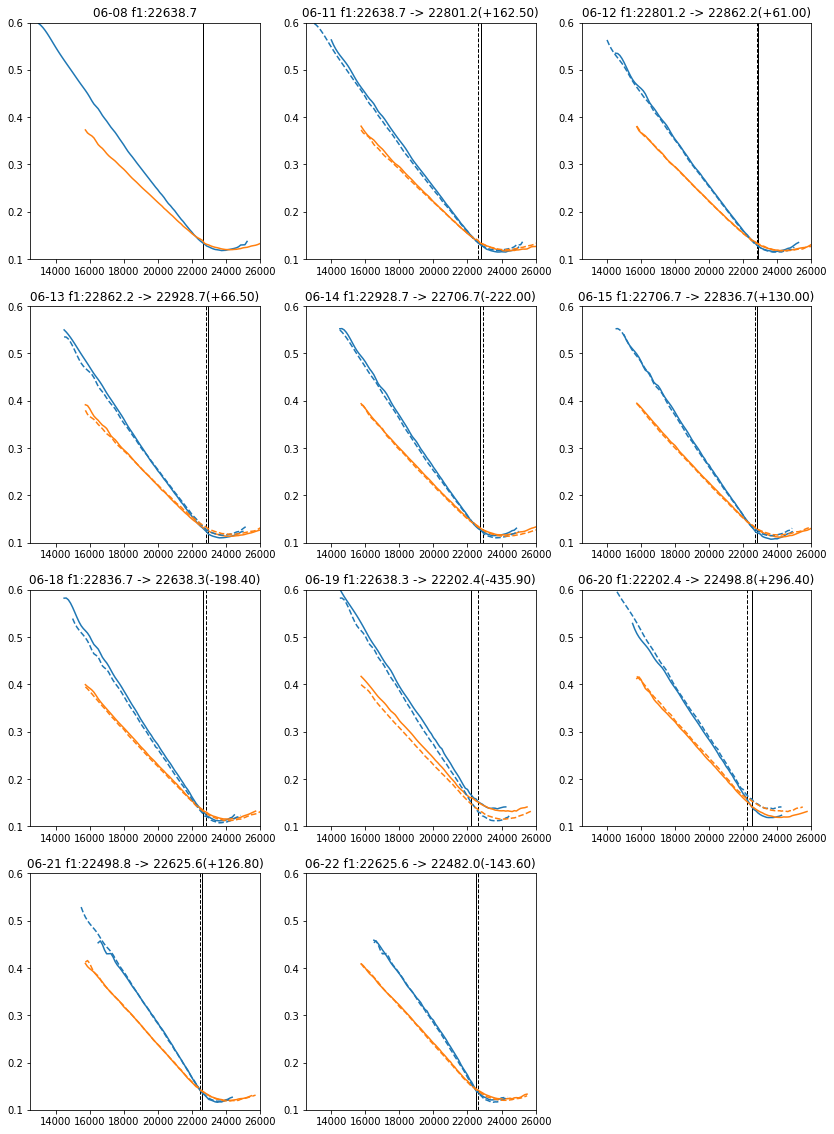

In [31]:
fig = plt.figure(figsize=(14, 20))
ax = [fig.add_subplot(4, 3, i) for i in range(1, 12)]
prev1, prev2 = None, None
for i, t0 in enumerate(fudebako.s_df.index):
    prev1, prev2 = fudebako.plot_iv(t0, ax[i], prev1, prev2, y_lim=(0.1, 0.6))
plt.show()

In [15]:
fudebako.s_df.columns

Index(['1807', '1808'], dtype='object')

In [32]:
fudebako.set_data(
    "data/s_20180511-07.pickle",
    "data/op1_20180511-07.pickle",
    "data/op2_20180511-07.pickle",
)

In [34]:
len(fudebako.s_df)

20

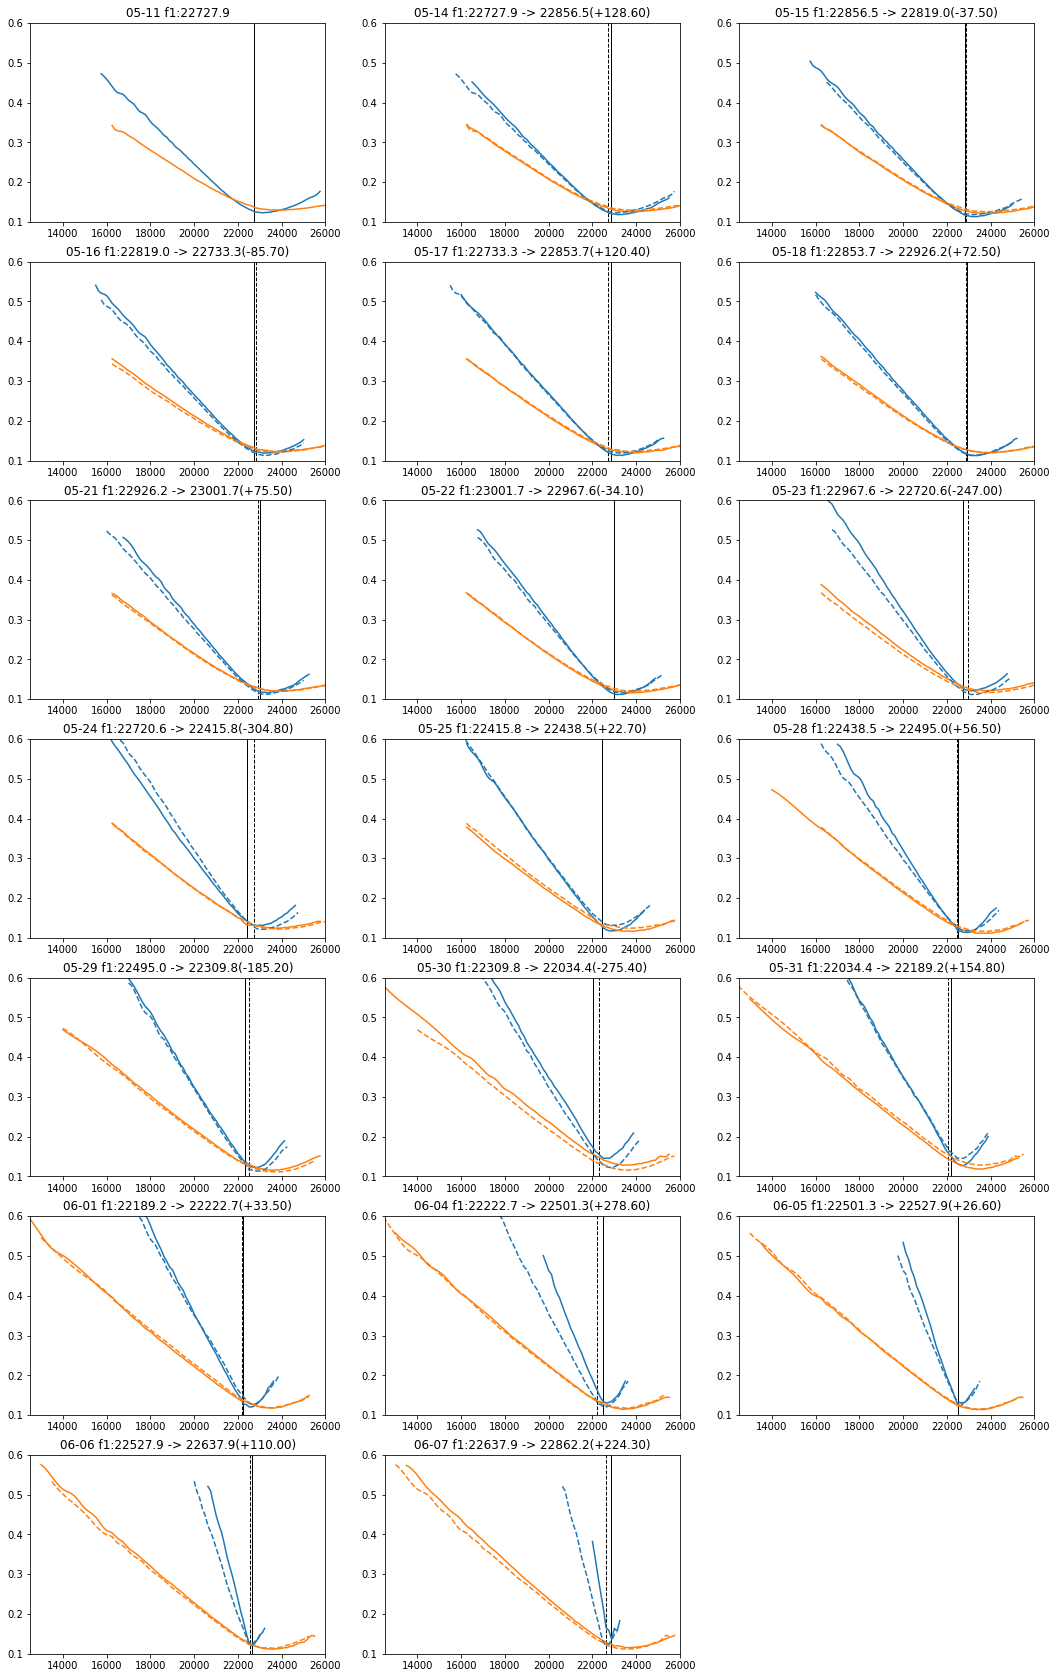

In [37]:
fig = plt.figure(figsize=(18, 30))
ax = [fig.add_subplot(7, 3, i) for i in range(1, 21)]
prev1, prev2 = None, None
for i, t0 in enumerate(fudebako.s_df.index):
    prev1, prev2 = fudebako.plot_iv(t0, ax[i], prev1, prev2, y_lim=(0.1, 0.6))
plt.show()